In [61]:
import pandas as pd
smalltalk_df = pd.read_csv('../data/smalltalk_intent.csv')
smalltalk_df['Intent'] = smalltalk_df['Intent'].str[10:]
smalltalk_df['Subject'] = smalltalk_df['Intent'].str.split('_').str[0]
smalltalk_df['Intent'] = smalltalk_df['Intent'].str.split('_').str[1:].apply('_'.join)
smalltalk_df = smalltalk_df.rename(columns= {'Utterances':'Input'})
smalltalk_df = smalltalk_df[['Input','Subject','Intent']]
smalltalk_df = smalltalk_df.drop_duplicates()
set(smalltalk_df['Intent'])

{'acquaintance',
 'age',
 'angry',
 'annoying',
 'answer_my_question',
 'back',
 'bad',
 'be_clever',
 'beautiful',
 'birth_date',
 'bored',
 'boring',
 'boss',
 'busy',
 'bye',
 'can_not_sleep',
 'cancel',
 'chatbot',
 'clever',
 'crazy',
 'does_not_want_to_talk',
 'excited',
 'fired',
 'funny',
 'going_to_bed',
 'good',
 'goodevening',
 'goodmorning',
 'goodnight',
 'ha_ha',
 'happy',
 'has_birthday',
 'hello',
 'here',
 'hold_on',
 'how_are_you',
 'hug',
 'hungry',
 'i_do_not_care',
 'joking',
 'likes_agent',
 'lonely',
 'looks_like',
 'loves_agent',
 'marry_user',
 'misses_agent',
 'my_friend',
 'needs_advice',
 'nice_to_meet_you',
 'nice_to_see_you',
 'nice_to_talk_to_you',
 'no',
 'no_problem',
 'occupation',
 'origin',
 'ready',
 'real',
 'residence',
 'right',
 'sad',
 'sleepy',
 'sorry',
 'sure',
 'talk_to_me',
 'testing_agent',
 'thank_you',
 'there',
 'tired',
 'waits',
 'wants_to_see_agent_again',
 'wants_to_talk',
 'welcome',
 'well_done',
 'what_do_you_mean',
 'whatsup',


In [77]:
labels = set(smalltalk_df['Subject'])

In [78]:
df_dict = {}
for label in labels:
    df_dict[label] = smalltalk_df[smalltalk_df['Subject']==label]

In [81]:
from sklearn.model_selection import train_test_split

inputs = smalltalk_df['Input'].values
labels = smalltalk_df['Subject'].values

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, stratify=labels, test_size=0.3, random_state=1)


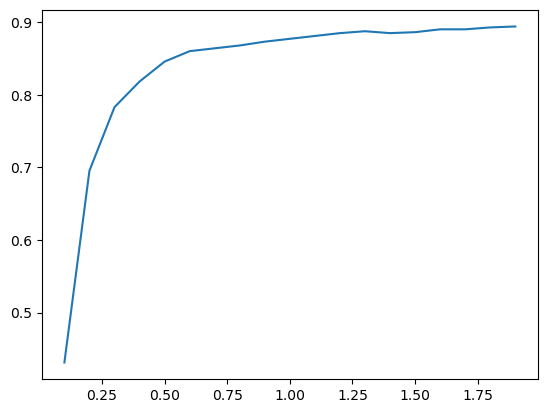

In [105]:
from sklearn . linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np, matplotlib.pyplot as plt
from sklearn . metrics import accuracy_score , f1_score , confusion_matrix

vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train_tf = vect.fit_transform(X_train)
scores = []
cs = []
for c in np.arange(0.1,2, 0.1):
    clf = SVC(C=c, kernel='rbf').fit(X_train_tf, y_train)
    X_test_tf = vect.transform(X_test)
    predicted = clf.predict(X_test_tf)
    scores.append(accuracy_score(y_test, predicted))
    cs.append(c)

plt.plot(cs, scores)

In [ ]:

X_test_tf = vect.transform(X_test)
predicted = clf.predict(X_test_tf)
print(confusion_matrix(y_test, predicted))
print(accuracy_score(y_test, predicted))

[[266   0   2   0   0   1   5]
 [  5  53  15   0   0   1   2]
 [  0   1  72   4   0   1   2]
 [  2   1   3  31   0   1   1]
 [  1   0   4   0   6   0   2]
 [  3   3   3   0   0  69   5]
 [  8   2   6   2   0   1 181]]
0.8862745098039215


In [85]:
new_data = ["I don't agree with that.", "how are you doing today?","do you like me?"]
processed_new_data = vect.transform(new_data)
clf.predict(processed_new_data)

array(['confirmation', 'greetings', 'user'], dtype=object)